## Marks Predictor - ML Modelling

In [6]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
path=r"C:\Users\swast\OneDrive\Desktop\DataAnl & DataSc\Python_Projects\ML Project\student_info.csv"
df=pd.read_csv(path)

In [8]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [9]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [10]:
df.shape

(200, 2)

In [11]:
'''Discover and Visualise Data to Gain Insights'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [12]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


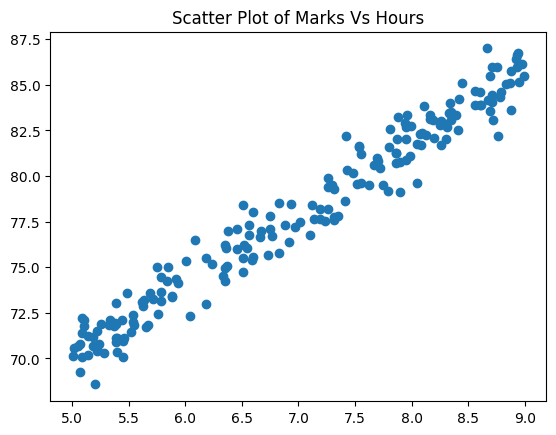

In [13]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel=('Student Study Hours')
plt.ylabel=('Student Marks')
plt.title('Scatter Plot of Marks Vs Hours')
plt.show() 
# plt. show() starts an event loop, looks for all currently active figure 
# objects, and opens one or more interactive windows that display your figure 
# or figures

In [14]:
# Prepare the data for ML Algorithm
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [15]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [16]:
# Filling the null values with the mean value
df2 = df.fillna(df.mean())

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [18]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [19]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [24]:
# Split Dataset
x= df2.drop('student_marks',axis='columns')
y= df2.drop('study_hours',axis='columns')
x.shape, y.shape

((200, 1), (200, 1))

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=51)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 1), (40, 1), (160, 1), (40, 1))

In [26]:
# Select a model and train it
# y=mx+c -> Linear Regressive Model, according to the data obtained
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [27]:
# Training our Machine Learning Model
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
lr.coef_ #Value of 'm'

array([[3.93571802]])

In [30]:
lr.intercept_ #Value of 'c'

array([50.44735504])

In [35]:
# Our Machine Learning Model is ready and we are good to train our model
lr.predict([[8]])[0][0]
# Two square brackets for two arrays,
# One for long array and the other for individual values in the arrays

C:\Users\swast\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.93309917012903

In [38]:
# Test our ML Model
y_pred=lr.predict(x_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [43]:
# Storing Test Value and Predicted Value in a DataFrame
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Study_Hours','Student_Marks_Test','Student_Marks_Predicted'])

,Study_Hours,Student_Marks_Test,Student_Marks_Predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [45]:
# Accuracy of ML Model
lr.score(x_test,y_test)*100
# Percentage of Accuracy of our ML Model

95.14124242154463

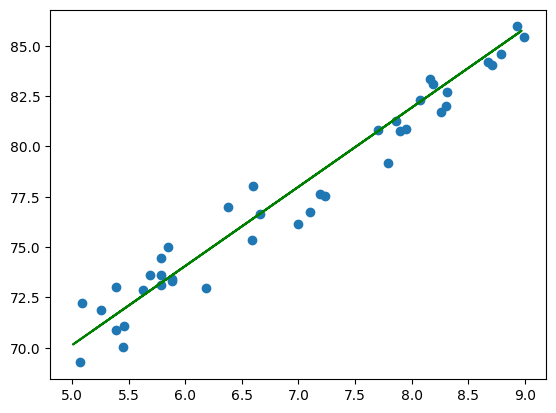

In [47]:
plt.scatter(x_test,y_test) # Gives scatter points for all test datapoints
plt.plot(x_train,lr.predict(x_train),color='g') # Gives the green line for prediction for calculated values of 'm' and 'c'

In [48]:
# Save ML Model
import joblib
joblib.dump(lr, 'Marks_Predictor.pkl')

['Marks_Predictor.pkl']